[0.00000000e+00 5.00400000e+02 1.00040000e+03 ... 9.99990003e+07
 9.99995003e+07 1.00000000e+08]
[-0.08025732 -0.08016494 -0.07994423 ...  0.19122919  0.19136439
  0.19146437]


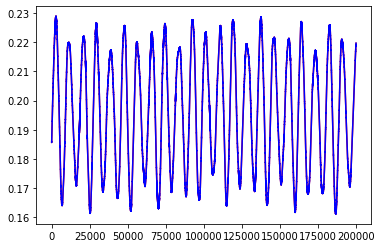

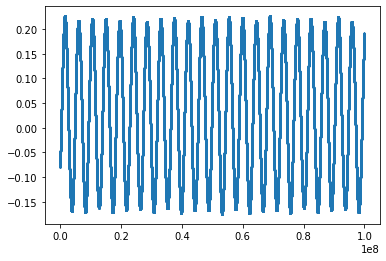

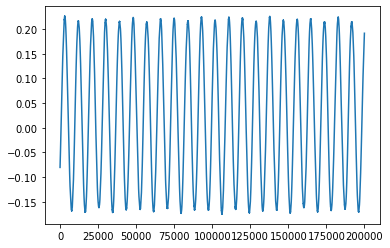

19
1.8999905000474995e-07


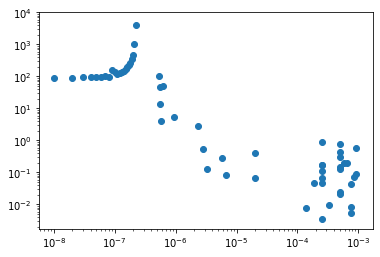

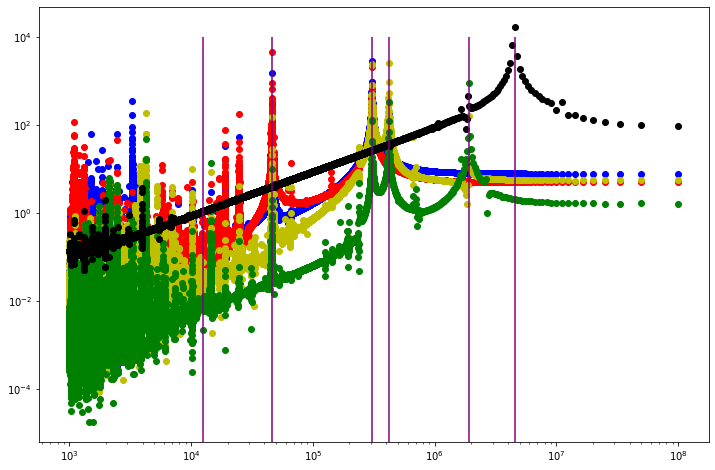

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sbody = '2001 FO185'
objname = '2001FO185'
dt=500.
#path = 'Asteroids/'+objname
path = 'TNOs/'+objname
series = pd.read_csv(path+'/series_new.csv')

t = series['t'].values
print(t)
a = series['a'].values
e = series['e'].values
inc = series['inc'].values/180*np.pi
omega = series['omega'].values/180*np.pi
Omega = series['Omega'].values/180*np.pi
M = series['M'].values/180*np.pi
h = np.sin(inc)*np.sin(Omega)
k = np.sin(inc)*np.cos(Omega)
print(h)
plt.plot(inc,c='r')
O_n = np.arctan2(h,k)
i_n = np.arcsin(h/np.sin(O_n))
plt.plot(i_n,c='b')
plt.show()
p = e*np.sin(Omega+omega)
q = e*np.cos(Omega+omega)

hj = series['hj'].values
kj = series['kj'].values
pj = series['pj'].values
qj = series['qj'].values

hs = series['hs'].values
ks = series['ks'].values
ps = series['ps'].values
qs = series['qs'].values

hn = series['hn'].values
kn = series['kn'].values
pn = series['pn'].values
qn = series['qn'].values

hu = series['hu'].values
ku = series['ku'].values
pu = series['pu'].values
qu = series['qu'].values

plt.scatter(t,h,s=0.5)
plt.show()
plt.plot(h)
plt.show()
plt.scatter(np.fft.rfftfreq(len(h),d=500),np.fft.rfft(h))
plt.xscale('log')
plt.yscale('log')

pYh = np.abs(np.fft.rfft(h))
pYhj = np.abs(np.fft.rfft(hj))
pYhs = np.abs(np.fft.rfft(hs))
pYhu = np.abs(np.fft.rfft(hu))
pYhn = np.abs(np.fft.rfft(hn))

hmax = np.argmax(pYh[1:])+1
ihumax = np.argmax(pYhu[1:])+1
ihnmax = np.argmax(pYhn[1:])+1 
ihsmax = np.argmax(pYhs[1:])+1 
ihjmax = np.argmax(pYhj[1:])+1 

pYk = np.abs(np.fft.rfft(k))
pYkj = np.abs(np.fft.rfft(kj))
pYks = np.abs(np.fft.rfft(ks))
pYku = np.abs(np.fft.rfft(ku))
pYkn = np.abs(np.fft.rfft(kn))

kmax = np.argmax(pYk[1:])+1
ikumax = np.argmax(pYku[1:])+1
iknmax = np.argmax(pYkn[1:])+1 
iksmax = np.argmax(pYks[1:])+1 
ikjmax = np.argmax(pYkj[1:])+1 

pYp = np.abs(np.fft.rfft(p))
pYpj = np.abs(np.fft.rfft(pj))
pYps = np.abs(np.fft.rfft(ps))
pYpu = np.abs(np.fft.rfft(pu))
pYpn = np.abs(np.fft.rfft(pn))

pmax = np.argmax(pYp[1:])+1
ipumax = np.argmax(pYpu[1:])+1
ipnmax = np.argmax(pYpn[1:])+1 
ipsmax = np.argmax(pYps[1:])+1 
ipjmax = np.argmax(pYpj[1:])+1 
print(pmax)

pYq = np.abs(np.fft.rfft(q))
pYqj = np.abs(np.fft.rfft(qj))
pYqs = np.abs(np.fft.rfft(qs))
pYqu = np.abs(np.fft.rfft(qu))
pYqn = np.abs(np.fft.rfft(qn))

qmax = np.argmax(pYq[1:])+1
iqumax = np.argmax(pYqu[1:])+1
iqnmax = np.argmax(pYqn[1:])+1 
iqsmax = np.argmax(pYqs[1:])+1 
iqjmax = np.argmax(pYqj[1:])+1 

n = len(h)
freqs = np.fft.rfftfreq(n,d=dt)
print(freqs[pmax])
plt.figure(figsize=(12,8))
xs = [1,10000]
plt.vlines(x = [1/freqs[ihumax], 1/freqs[ihnmax], 1/freqs[ihsmax], 1/freqs[ihjmax],1/freqs[hmax],1/8.018234063349899e-05, 1/(freqs[hmax]-freqs[ihnmax])], ymin = 0, ymax = max(xs),
           colors = 'purple',
           label = 'vline_multiple - full height')

plt.scatter(1/freqs[1:],pYhj[1:],label='particle',c='b')
plt.scatter(1/freqs[1:],pYhs[1:],label='particle',c='r')
plt.scatter(1/freqs[1:],pYhu[1:],label='particle',c='y')
plt.scatter(1/freqs[1:],pYhn[1:],label='particle',c='g')
plt.scatter(1/freqs[1:],pYh[1:],label='particle',c='k')

plt.xscale('log')
plt.yscale('log')

In [8]:
from scipy.optimize import minimize, differential_evolution, brute
from scipy import stats
#x = np.linspace(-10, 30, 100)

print(len(pYhj),ihjmax)
newfreq = 8.01e-5
best = -100

def MLE_Norm(parameters, vector):
    # extract parameters
    #const, phase, std_dev = parameters
    c1,c2,c3,c4, freq, const, phase = parameters
    added = 0
    y = 0
    if vector == "h":
        added = c1*hj+c2*hs+c3*hu+c4*hn
        y = h
    elif vector == "k":
        added = c1*kj+c2*ks+c3*ku+c4*kn
        y = k
    elif vector == "p":
        added = c1*pj+c2*ps+c3*pu+c4*pn
        y = p
    elif vector == "q":
        added = c1*qj+c2*qs+c3*qu+c4*qn
        y = q
    # predict the output
   
    pred = const*np.sin(2*np.pi*freq*t+phase) + added
    #print(y)
    chisq = np.sum((y-pred)**2)
    LL = -0.5*chisq
    neg_LL = -1*LL
    #print(neg_LL)
    return neg_LL

str1 = "h"
str2 = "k"
str3 = "p"
str4 = "q"

mle_model_h = minimize(MLE_Norm, np.array([0, 0, 0, 0, freqs[hmax], 0.2, 0]), method='Powell', args=(str1))
mle_model_k = minimize(MLE_Norm, np.array([0, 0, 0, 0, freqs[kmax], 0.2, 0]), method='Powell',args=(str2))
mle_model_p = minimize(MLE_Norm, np.array([0, 0, 0, 0, freqs[pmax]/0.98, -0.12, 0]), method='Powell', args=(str3))
mle_model_q = minimize(MLE_Norm, np.array([0, 0, 0, 0, freqs[qmax], 0.2, 0]), method='Powell',args=(str4))
print(mle_model_h.x)
print(mle_model_k.x)
print(mle_model_p.x)
print(mle_model_q.x)
#print(diff_model_h)

100001 327
[-4.94747452e-03 -2.44359772e-03 -1.23883607e-02 -8.61575796e-02
  2.22728637e-07  1.93740418e-01 -6.21362556e-01]
[ 5.18113981e-03  2.35027002e-03  1.14672402e-02  8.06836942e-02
  2.22733265e-07  1.93840774e-01 -2.19687129e+00]
[ 3.33008144e-02  1.38797801e-02 -4.01604801e-03 -4.35511017e-02
  1.93634685e-07 -1.16751302e-01 -2.17064172e-02]
[-2.78721394e-02 -1.09873289e-02  2.37716290e-03  3.81747605e-02
  1.93633895e-07  1.16710676e-01 -1.59175816e+00]


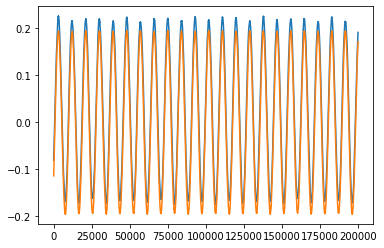

Log-likelihood: -67.99231283896103


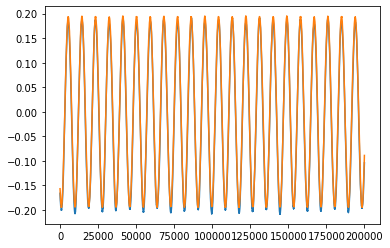

Log-likelihood: -8.29932268392882


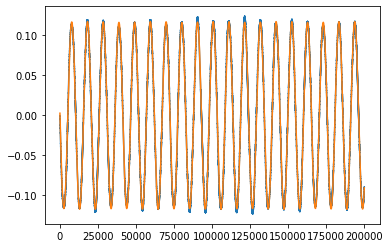

Log-likelihood: -0.8445268697748994


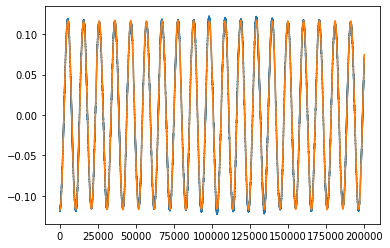

Log-likelihood: -0.8235259997580859


In [9]:
c1_h = mle_model_h.x[0]
c2_h = mle_model_h.x[1]
c3_h = mle_model_h.x[2]
c4_h = mle_model_h.x[3]
freq_h = mle_model_h.x[4]
const_h = mle_model_h.x[5]
phase_h = mle_model_h.x[6]
guess_h = const_h*np.sin(2*np.pi*freq_h*t+phase_h)
sec_h = c1_h*hj+c2_h*hs+c3_h*hu+c4_h*hn
pred_h = sec_h + guess_h

h_rem = h - sec_h 

c1_k = mle_model_k.x[0]
c2_k = mle_model_k.x[1]
c3_k = mle_model_k.x[2]
c4_k = mle_model_k.x[3]
freq_k = mle_model_k.x[4]
const_k = mle_model_k.x[5]
phase_k = mle_model_k.x[6]
guess_k = const_k*np.sin(2*np.pi*freq_k*t+phase_k)
sec_k = c1_k*kj+c2_k*ks+c3_k*ku+c4_k*kn
pred_k = sec_k + guess_k

k_rem = k - sec_k 

c1_p = mle_model_p.x[0]
c2_p = mle_model_p.x[1]
c3_p = mle_model_p.x[2]
c4_p = mle_model_p.x[3]
freq_p = mle_model_p.x[4]
const_p = mle_model_p.x[5]
phase_p = mle_model_p.x[6]
'''
c1_p = 0
c2_p = 0
c3_p = 0
c4_p = 0
freq_p = freqs[pmax]/0.98
const_p = -0.12
phase_p = 0
offset_p = 0
'''
guess_p = const_p*np.sin(2*np.pi*freq_p*t+phase_p)
sec_p = c1_p*pj+c2_p*ps+c3_p*pu+c4_p*pn
pred_p = sec_p + guess_p

p_rem = p - sec_p 

c1_q = mle_model_q.x[0]
c2_q = mle_model_q.x[1]
c3_q = mle_model_q.x[2]
c4_q = mle_model_q.x[3]
freq_q = mle_model_q.x[4]
const_q = mle_model_q.x[5]
phase_q = mle_model_q.x[6]
guess_q = const_q*np.sin(2*np.pi*freq_q*t+phase_q)
sec_q = c1_q*qj+c2_q*qs+c3_q*qu+c4_q*qn
pred_q = sec_q + guess_q

q_rem = q - sec_q 

plt.plot(h)
plt.plot(pred_h)
plt.show()
chisq = (h-pred_h)**2
llh = -0.5*np.sum(chisq)
print('Log-likelihood:',llh)

plt.plot(k)
plt.plot(pred_k)
plt.show()
chisq = (k-pred_k)**2
llh = -0.5*np.sum(chisq)
print('Log-likelihood:',llh)

plt.plot(p)
plt.plot(pred_p)
plt.show()
chisq = (p-pred_p)**2
llh = -0.5*np.sum(chisq)
print('Log-likelihood:',llh)

plt.plot(q)
plt.plot(pred_q)
plt.show()
chisq = (q-pred_q)**2
llh = -0.5*np.sum(chisq)
print('Log-likelihood:',llh)

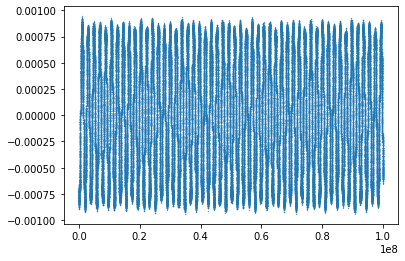

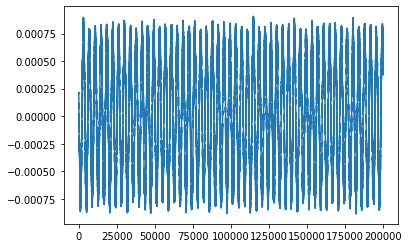

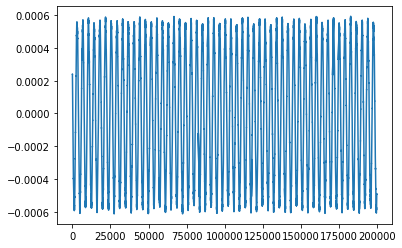

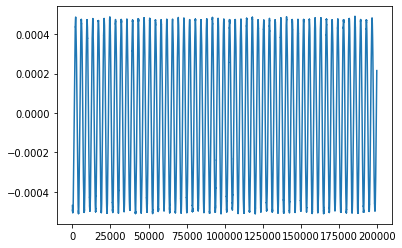

In [12]:
plt.scatter(t,sec_h,s=0.1)
plt.show()
plt.plot(sec_k)
plt.show()
plt.plot(sec_p)
plt.show()
plt.plot(sec_q)

[-0.07944228 -0.07932612 -0.07909269 ...  0.19196119  0.19208577
  0.19221171] [-0.43081051 -0.43020356 -0.42880951 ...  0.87792805  0.87832876
  0.87863087] [0.18546331 0.18545327 0.18550933 ... 0.22043338 0.22047651 0.22054633]


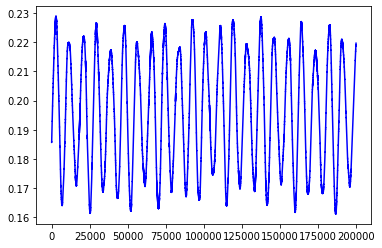

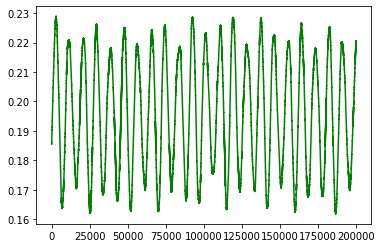

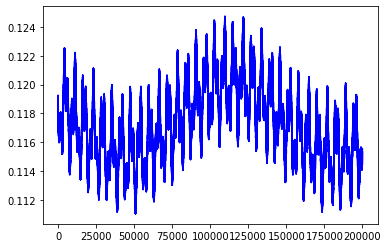

0.19603703017328875 0.19495715316811174 0.19604303424415212
0.11703925682999625 0.1167592 0.11677334953826589


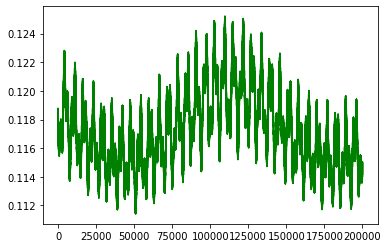

In [6]:
Omega_n = np.arctan2(h,k)
inc_n = np.arcsin(h/np.sin(Omega_n))

Omega_new = np.arctan2(h_rem,k_rem)
inc_new = np.arcsin(h_rem/np.sin(Omega_new))
print(h_rem,np.sin(Omega_new),inc_new)


q = e*np.cos(Omega+omega)

pomega_n = np.arctan2(p,q)
omega_n = pomega_n - Omega_n
ecc_n = np.arcsin(p/np.sin(pomega_n))

pomega_new = np.arctan2(p_rem,q_rem)
omega_new = pomega_new - Omega_new
ecc_new = np.arcsin(p_rem/np.sin(pomega_new))


plt.plot(inc_n,'b')
plt.show()
plt.plot(inc_new,c='g')
plt.show()

plt.plot(ecc_n,'b')
plt.show()
plt.plot(ecc_new,c='g')

print(np.mean(inc_new), np.arcsin(0.1937245), np.mean(inc))

print(np.mean(ecc_new), 0.1167592, np.mean(e))